# RNN  Example 

In [1]:
from pandas import read_csv
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Import data

In [2]:
infile = './sunspots.csv'
split_percent = 0.8 


In [3]:
#FUNCTIONS
def s_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
     
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual, color='Red')
    plt.plot(range(rows), predictions, color='Green')
    plt.axvline(x=len(trainY), color='b')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Blue Line Separates The Training And Test Examples')
 

In [4]:
# DATA
input_df = read_csv(infile, usecols=[1])
scaler = MinMaxScaler(feature_range=(0, 1))
data = np.array(input_df.values.astype('float32'))
data = scaler.fit_transform(data).flatten()
n = len(data)
# Split data into train and test
split = int(n*split_percent)
train_data = data[range(split)]
test_data = data[split:]

In [5]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

print(testX, testY)


[[[5.22064567e-01]
  [5.06304145e-01]
  [3.30575258e-01]
  [4.30654049e-01]
  [4.59810823e-01]
  [5.13396382e-01]
  [5.71709991e-01]
  [5.42553127e-01]
  [3.96769077e-01]
  [4.92119759e-01]
  [2.93144196e-01]
  [3.49881798e-01]]

 [[3.87706846e-01]
  [4.69661117e-01]
  [3.40819538e-01]
  [3.97951126e-01]
  [5.01970053e-01]
  [3.84160727e-01]
  [6.51300192e-01]
  [4.55870718e-01]
  [3.53033870e-01]
  [3.90464902e-01]
  [4.81481433e-01]
  [3.65248203e-01]]

 [[3.16390842e-01]
  [3.04964513e-01]
  [2.54531115e-01]
  [4.29866016e-01]
  [4.66115028e-01]
  [3.97951126e-01]
  [3.84554744e-01]
  [4.16863650e-01]
  [4.43656385e-01]
  [3.47123682e-01]
  [2.68321484e-01]
  [1.65878624e-01]]

 [[1.98975563e-01]
  [2.34042540e-01]
  [3.28211188e-01]
  [2.39164680e-01]
  [2.14341998e-01]
  [3.30575258e-01]
  [2.65957445e-01]
  [4.15681601e-01]
  [2.62017310e-01]
  [2.16706052e-01]
  [2.30102435e-01]
  [2.69109517e-01]]

 [[1.79669008e-01]
  [1.75334901e-01]
  [1.82821110e-01]
  [1.29235610e-01]
  [1

In [6]:
# RNN Training
model = s_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), activation=['tanh', 'tanh'])

# TRAIN
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
 - 1s - loss: 0.0172
Epoch 2/20
 - 1s - loss: 0.0099
Epoch 3/20
 - 1s - loss: 0.0074
Epoch 4/20
 - 1s - loss: 0.0062
Epoch 5/20
 - 1s - loss: 0.0055
Epoch 6/20
 - 1s - loss: 0.0051
Epoch 7/20
 - 1s - loss: 0.0048
Epoch 8/20
 - 1s - loss: 0.0045
Epoch 9/20
 - 1s - loss: 0.0045
Epoch 10/20
 - 1s - loss: 0.0043
Epoch 11/20
 - 1s - loss: 0.0042
Epoch 12/20
 - 1s - loss: 0.0041
Epoch 13/20
 - 1s - loss: 0.0040
Epoch 14/20
 - 1s - loss: 0.0040
Epoch 15/20
 - 1s - loss: 0.0039
Epoch 16/20
 - 1s - loss: 0.0039
Epoch 17/20
 - 1s - loss: 0.0037
Epoch 18/20
 - 1s - loss: 0.0037
Epoch 19/20
 - 1s - loss: 0.0037
Epoch 20/20
 - 1s - loss: 0.0037


In [7]:
## PREDICT
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

## Errors
train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse)) 

Train RMSE: 0.060 RMSE
Test RMSE: 0.080 RMSE


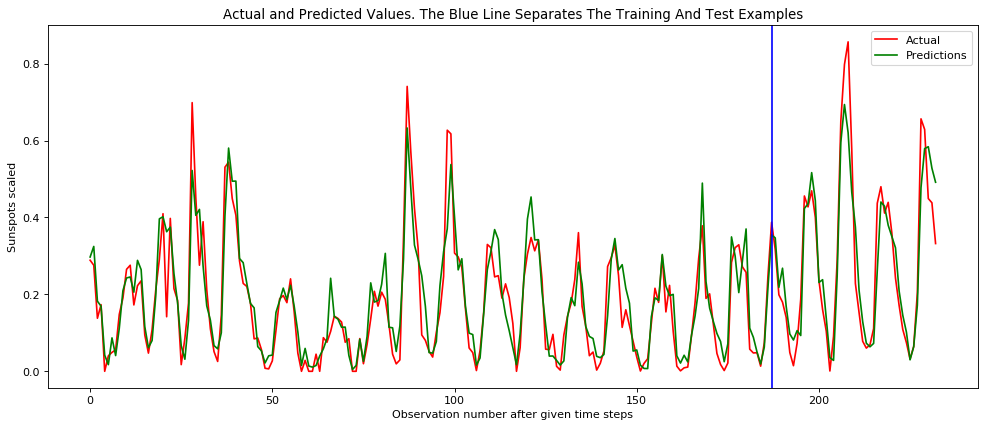

In [8]:
plot_result(trainY, testY, train_predict, test_predict)
